In [114]:
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv("UberDataset.csv")

##Let's Understand our Data

In [116]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 36.2+ KB


In [92]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [93]:
df.shape

(1156, 7)

## Let's Clean it

1. Missing values in purpose are replaced with not.
2. Convert Start date and End date to datetime format from string

In [94]:
df['PURPOSE'] = df['PURPOSE'].fillna("NOT")

In [95]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [96]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors = 'coerce')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 45.2+ KB


## I want to make two new columns to separately mention date and time

In [98]:
from datetime import datetime
df['Date'] = pd.DatetimeIndex(df['START_DATE']).date

In [99]:
df['Time'] = pd.DatetimeIndex(df['START_DATE']).hour

In [100]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


## Let's arrange rides based on early morning, morning, aftermoon , night

<!-- Let's devide the rides based on 
Mid night (0-6)
Morning (7-10), 
Afternoon (11-15)
Evening (16-19), 
Night (20-24)  -->

In [101]:
df['Day_Night'] = pd.cut(x=df['Time'], bins = [0,6,10,15,19,24], labels = ['Early morning','Morning', 'Afternoon', 'Evening', 'Night'])

In [102]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day_Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Early morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [103]:
df.dropna(inplace = True)

In [104]:
df.shape

(413, 10)

## Data Visualization

<Axes: xlabel='count', ylabel='PURPOSE'>

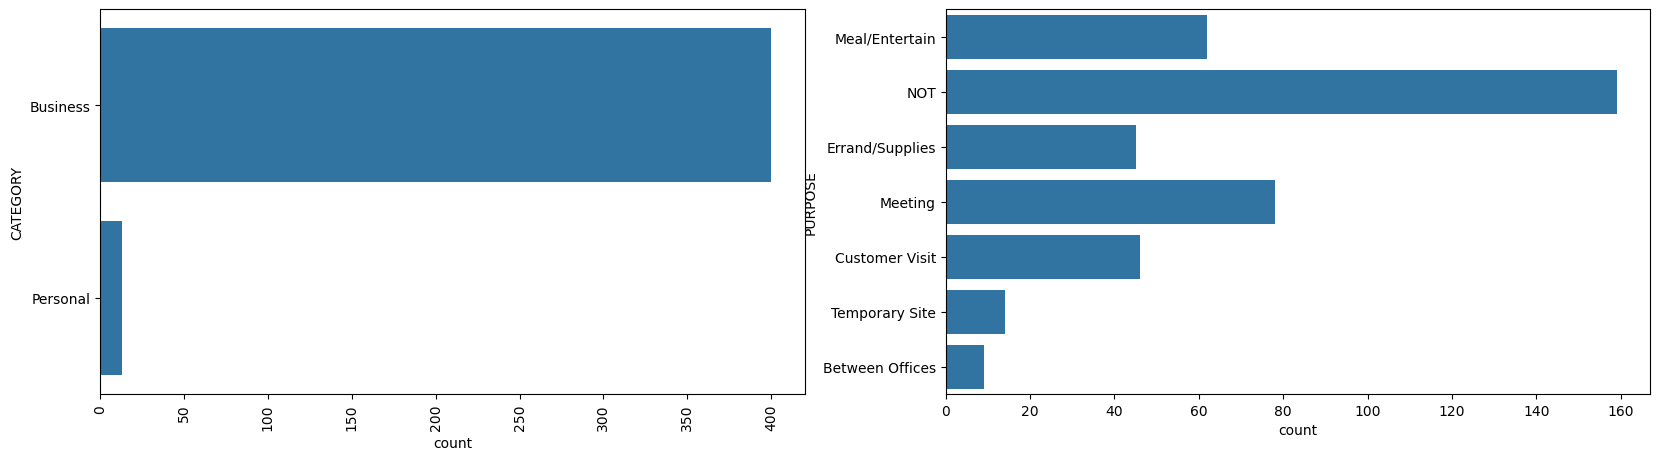

In [105]:
## In which category do people book the most Ube rides?
## For which purpose do people book Uber rides the most?

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])

## People use uber more for Bussiness catagory
## People use uber for meetings, then meal and entertainment

<Axes: xlabel='count', ylabel='Day_Night'>

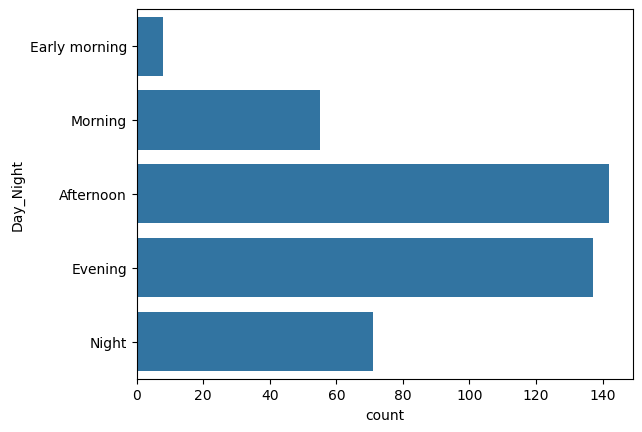

In [106]:
## At what time do people book cabs the most from Uber?
sns.countplot(df['Day_Night'])

## Most people book uber in the afternoon

In [107]:
## In which month people book Ube less frequntly?
df['Month'] = pd.DatetimeIndex(df['START_DATE']).month          ## Found month from start date and made a new column for that
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'March',  4.0 : 'April', 
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 
               9.0: 'Sept', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df['Month'] = df.Month.map(month_label)   ## to map numbers to month name
mon = df.Month.value_counts(sort= False)    ## Calculates the counts of every month

In [108]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day_Night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Early morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


## I wrote below code in two ways

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

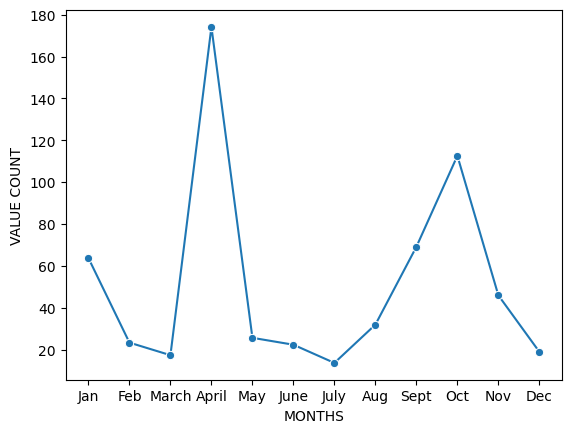

In [109]:
# Group by Month and get max miles
monthly_max = df.groupby('Month', sort=False)['MILES'].max().reset_index()

# Rename columns for clarity
monthly_max.rename(columns={'MILES': 'VALUE COUNT', 'Month': 'MONTHS'}, inplace=True)

# Plot
p = sns.lineplot(data=monthly_max, x='MONTHS', y='VALUE COUNT', marker="o")
p.set(xlabel='MONTHS', ylabel="VALUE COUNT")

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

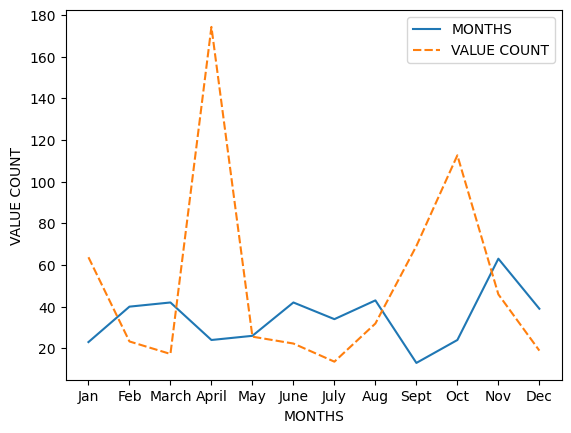

In [110]:
df = pd.DataFrame({
    "MONTHS": mon.values,  ## Total count of every month
    'VALUE COUNT': df.groupby('Month', sort = False)['MILES'].max()  ## Maximum miles of every month
})

p = sns.lineplot (data = df)  
p.set (xlabel = 'MONTHS', ylabel = "VALUE COUNT")   ## Sets axis labels

In [120]:
## ON WHICH DAYS OF THE WEEK DO PEOPLE BOOK UBER RIDES THE MOST

# Make sure START_DATE is in datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['DAY'] = df['START_DATE'].dt.weekday
data_label = {
    0:'Mon', 1:'Tues', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'
}
df['DAY'] = df['DAY'].map(day_label)


<class 'ValueError'>: time data "1/13/2016 13:54" doesn't match format "%m-%d-%Y %H:%M", at position 23. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.